In [1]:
%matplotlib inline

In [2]:
import numpy as np
import time

import evaluator

## Plot

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def plot_seg(seg, border=False):
    unique, unique_inverse = np.unique(seg, return_inverse=True)
    N = len(unique)
    cmap = np.random.rand(N,3)
    if border:
        cmap[0,:] = 0
    cmap = matplotlib.colors.ListedColormap(cmap)
    plt.imshow(np.arange(N)[unique_inverse].reshape(seg.shape), cmap=cmap)

## Arguments

In [5]:
from types import SimpleNamespace

In [6]:
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/SNEMI3D/test/models/kasthuri11/snemi3d/metric/mean/aug4/mip1/w32d3/gn32/p160-20/myelin/vec30/vec1_mye1/iter_1800000/mip0/fov160-20/aff4'
# d['gs_input'] = 'gs://neuroglancer/kisuk/SNEMI3D/test/models/kasthuri11/superhuman/direct/long/aug4/mip0/bce/depth4_patch160-20/iter_200000/fov256-20/static/aug16/aff'
d['dtype']   = 'float32'
d['in_mip']  = 0
d['begin']   = None
d['end']     = None
d['center']  = None
d['size']    = None
d['cache']   = True
d['parallel'] = 8

aff_arg = SimpleNamespace(**d)

In [7]:
d = dict()

d['gs_input'] = 'gs://neuroglancer/kisuk/SNEMI3D/test/models/kasthuri11/snemi3d/metric/mean/aug4/mip1/w32d3/gn32/p160-20/myelin/vec30/vec1_mye1/iter_1800000/mip0/fov160-20/mye'
d['dtype']   = 'float32'
d['in_mip']  = 0
d['begin']   = None
d['end']     = None
d['center']  = None
d['size']    = None
d['cache']   = True
d['parallel'] = 8

mye_arg = SimpleNamespace(**d)

## CloudVolume

In [8]:
aff = evaluator.cutout(aff_arg, dtype=aff_arg.dtype)

gs://neuroglancer/kisuk/SNEMI3D/test/models/kasthuri11/snemi3d/metric/mean/aug4/mip1/w32d3/gn32/p160-20/myelin/vec30/vec1_mye1/iter_1800000/mip0/fov160-20/aff4
begin = [0 0 0]
end = [1024 1024  100]
mip 0 = [slice(0, 1024, None), slice(0, 1024, None), slice(0, 100, None)]
mip 0 = [slice(0, 1024, 1), slice(0, 1024, 1), slice(0, 100, 1)]


Downloading: 444it [00:13, 14.65it/s]                         
Downloading: 436it [00:13, 20.62it/s]                         
Downloading: 446it [00:13, 20.29it/s]                         
Downloading: 440it [00:13, 14.21it/s]                         
Downloading: 440it [00:13, 13.11it/s]                         
Downloading: 446it [00:13, 12.16it/s]                         
Downloading: 446it [00:13, 10.45it/s]                         
Downloading: 444it [00:13,  7.95it/s]                         


In [9]:
mye = evaluator.cutout(mye_arg, dtype=mye_arg.dtype)

gs://neuroglancer/kisuk/SNEMI3D/test/models/kasthuri11/snemi3d/metric/mean/aug4/mip1/w32d3/gn32/p160-20/myelin/vec30/vec1_mye1/iter_1800000/mip0/fov160-20/mye
begin = [0 0 0]
end = [1024 1024  100]
mip 0 = [slice(0, 1024, None), slice(0, 1024, None), slice(0, 100, None)]
mip 0 = [slice(0, 1024, 1), slice(0, 1024, 1), slice(0, 100, 1)]


Downloading:  99%|█████████▉| 222/224 [00:00<00:00, 325.72it/s]
Downloading: 418it [00:00, 476.01it/s]                         
Downloading: 364it [00:00, 571.62it/s]                         
Downloading: 364it [00:00, 417.94it/s]                         
Downloading: 438it [00:00, 523.95it/s]                         
Downloading: 388it [00:00, 375.67it/s]                         
Downloading: 444it [00:00, 432.81it/s]                         


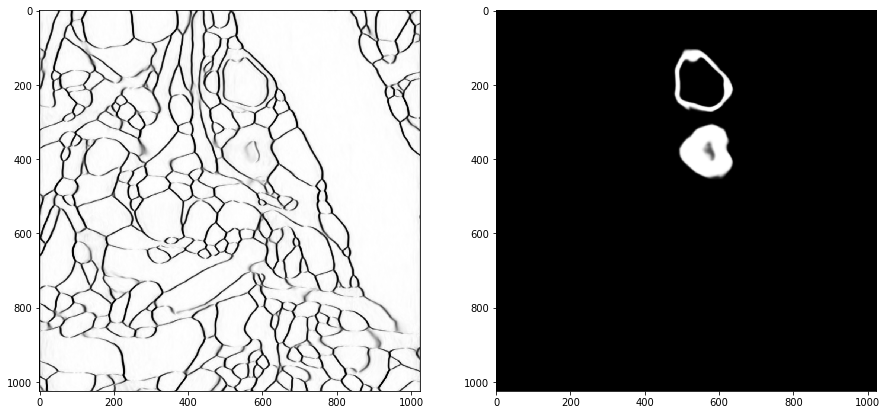

In [10]:
import matplotlib.pyplot as plt

z = 50
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(mye[z,:,:], cmap='gray')
plt.show()

### Min filtering

In [11]:
xy = np.minimum(aff[0,...],aff[1,...])
xy = np.minimum(xy, 1 - mye)
aff[0,...] = xy
aff[1,...] = xy
aff[2,...] = np.minimum(aff[2,...],xy)

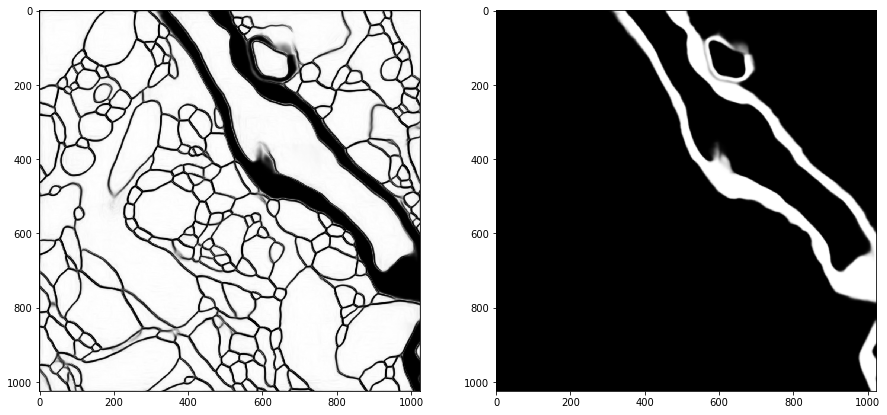

In [12]:
z = 10
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(aff[0,z,:,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(mye[z,:,:], cmap='gray')
plt.show()

## Evaluator

In [13]:
import datatools

class ConnectedComponents(evaluator.Segment):
    def __init__(self, k=10):
        self.k = k
        
    def __call__(self, data, threshold=0.5, **kwargs):
        seg = datatools.get_segmentation(data, threshold)
        return datatools.dilate_segmentation(seg, k=self.k).astype('uint32')

In [14]:
opt_thresh = 0.871

In [17]:
seg = evaluator.Segmentation(aff, segment=ConnectedComponents(k=10))
opt_seg = seg(threshold=opt_thresh)

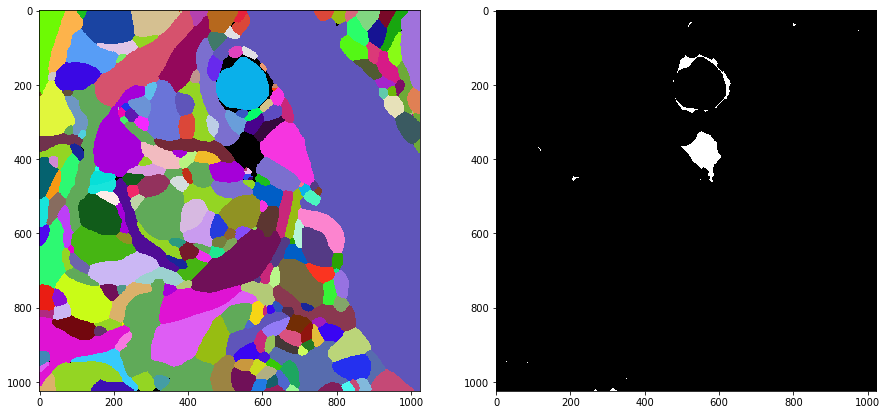

In [18]:
z = 59
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plot_seg(opt_seg[z,:,:], border=True)
plt.subplot(1,2,2)
plt.imshow(opt_seg[z,:,:]==0, cmap='gray')
plt.show()

## Save

In [19]:
import h5py
import os

/usr/people/kisuk/miniconda2/envs/conda36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
fpath = '~/pytorch-deepem/experiments/kasthuri11/snemi3d/metric/mean/aug4/mip1/w32d3/gn32/p160-20/myelin/vec30/vec1_mye1/forward/iter_1800000/mip0/fov160-20/aff4_mye/'
fpath = os.path.expanduser(fpath)
fpath = os.path.join(fpath, 'SNEMI3D-test_cc871_k10.h5')

In [21]:
if not os.path.exists(os.path.dirname(fpath)):
    os.makedirs(os.path.dirname(fpath))

In [22]:
with h5py.File(fpath, 'w') as f:
    f.create_dataset('/main', data=opt_seg.astype('uint32'))